In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from utils.signal_utils import Bandpass, DCFilter, Notch, Normalize, Resample

In [13]:
root = 'sessions'
subject = 'Erno'
session = 'session_06'

In [14]:
data = np.load(os.path.join(root, subject, session, 'data.npy'))
print(data.shape)
# channels: timestamps, triggers, 6 EEG channels

(10, 113250)


In [15]:
EEG_data = data[2:, :]
print(EEG_data.shape)
EEG_data = Bandpass(EEG_data, 0.1, 100.)
EEG_data = Notch(EEG_data, 50.)
data[2:, :] = EEG_data

(8, 113250)


In [20]:
# data = data[:, 250*10:]
# data.shape
# EEG_data = data[2:8, :]

#EEG_data = Bandpass(EEG_data, 5., 40.)
#EEG_data = DCFilter(EEG_data)

In [16]:
samples = []
for i in range(data.shape[-1]):
    trigger = data[1, i]
    if trigger in (2,3,4):
        samples.append(data[2:8, i:i+250*2])


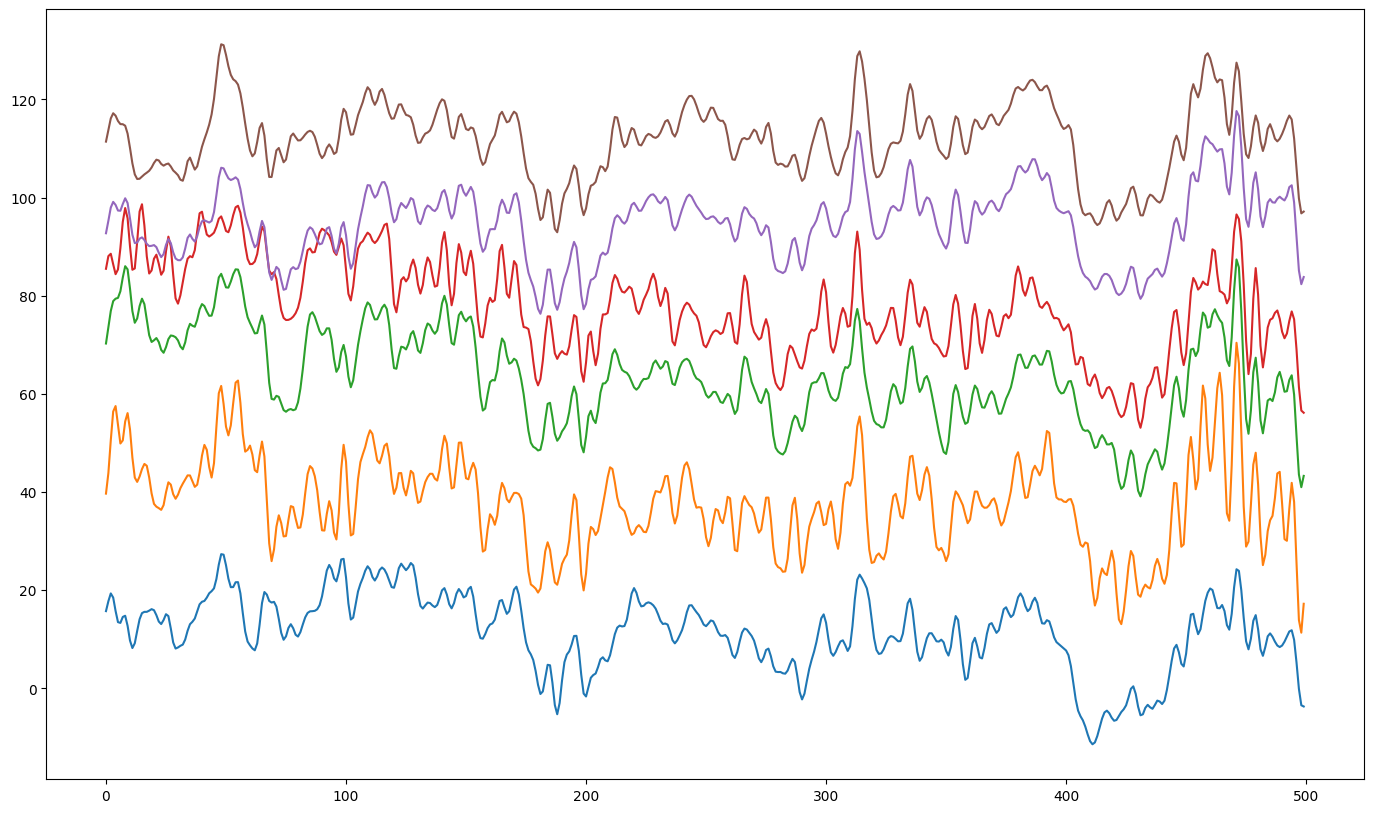

In [20]:
from utils.visualize import showMe
showMe(samples[10])

(6, 500)


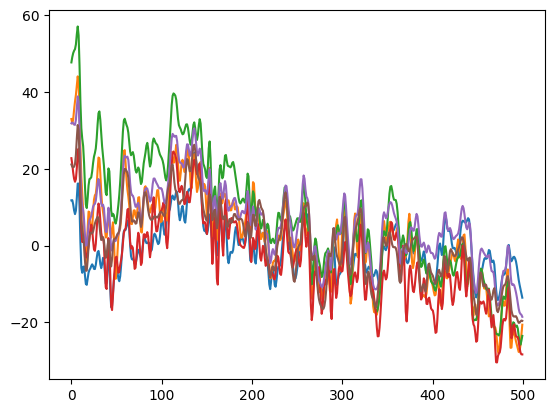

In [11]:
for sample in samples:
    sample = samples[15]
    print(sample.shape)
    for channel in sample:
        plt.plot(channel)
    plt.show()
    break

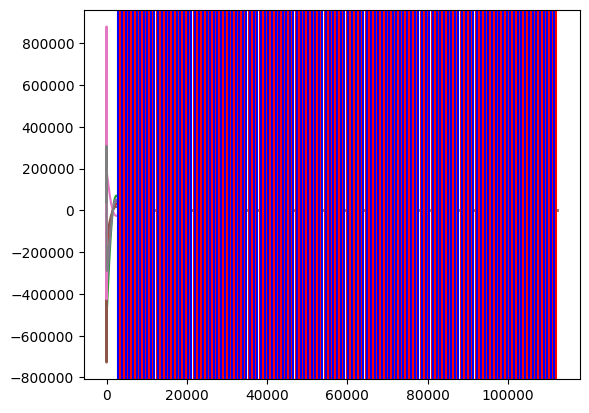

In [7]:
for channel in EEG_data:
    plt.plot(channel)
for i, trigger in enumerate(data[1]):
    if trigger == 10:
        color = 'r'
    else:
        color = 'b'
    if trigger > 0:
        plt.axvline(x=i, color=color, label='trigger')

plt.show()